In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
raw_data=pd.read_csv("use_this_data.csv")

In [28]:
data_set1=raw_data[((raw_data['z_s']>0.09) & (raw_data['z_s']<0.12)) & (raw_data['r']<18)]
data_set1.drop("z_s",axis=1,inplace=True)

data_set2=raw_data[((raw_data['z_s']>0.2) & (raw_data['z_s']<0.25)) & ((raw_data['r']<25)&(raw_data['r']>15))]
data_set2.drop("z_s",axis=1,inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8584\3279168576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1.drop("z_s",axis=1,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8584\3279168576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set2.drop("z_s",axis=1,inplace=True)


function to add spectroscopic features one by one and calculating matrics 

In [29]:
def evaluation(dataset):
    f=dataset.copy()
    f.drop(["NII","OIII","OII","h_beta","h_alpha"],axis=1,inplace=True)
    for i in ("NII","OIII","OII","h_beta","h_alpha"):
        print("adding",i)
        f=pd.concat([f,dataset[i]],axis=1)
        X=f.drop("metallicity",axis=1)
        y=f["metallicity"]
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
        etr=ExtraTreesRegressor(n_jobs=-1)
        etr.fit(x_train,y_train)
        y_predict=etr.predict(x_test)

        print("all objects rsme: ",(mean_squared_error(y_test,y_predict))**0.5)

        print("removing outliers")
        y_predict_data=pd.DataFrame(y_predict,columns=["y_predict"])
        x_test.reset_index(inplace = True, drop = True)
        y_test=pd.DataFrame(y_test)
        y_test.reset_index(inplace=True,drop=True)
        frame = pd.concat([x_test,y_test,y_predict_data], axis=1)
        frame.drop(frame[((frame['metallicity']-frame['y_predict'])**2 )>0.04 ].index,inplace=True)
        x_test_no_outliers=frame.drop(["y_predict","metallicity"],axis=1)
        y_test_no_outliers=frame["metallicity"]
        
        y_predict_no_outliers=etr.predict(x_test_no_outliers)
        
        print("rmse value:",mean_squared_error(y_test_no_outliers,y_predict_no_outliers)**0.5)
        print("r2 score:",r2_score(y_test_no_outliers,y_predict_no_outliers))
        print("OLF:",1-(len(y_test_no_outliers)/len(y_test)),"\n")




for data set 1

In [30]:
evaluation(data_set1)

adding NII
all objects rsme:  0.07333999829813229
removing outliers
rmse value: 0.06535377730936442
r2 score: 0.6366485417904515
OLF: 0.015859766277128595 

adding OIII
all objects rsme:  0.05269361581007559
removing outliers
rmse value: 0.04738835664972357
r2 score: 0.8180353698011265
OLF: 0.006260434056761244 

adding OII
all objects rsme:  0.045748618840536055
removing outliers
rmse value: 0.041723279319416766
r2 score: 0.8605917299825905
OLF: 0.0039649415692821766 

adding h_beta
all objects rsme:  0.04428072968116475
removing outliers
rmse value: 0.0400594901619231
r2 score: 0.8716086237770786
OLF: 0.0037562604340567463 

adding h_alpha
all objects rsme:  0.04342805752530466
removing outliers
rmse value: 0.03964387920737233
r2 score: 0.8745874004529886
OLF: 0.003547579298831427 



for data set 2

In [32]:
evaluation(data_set2)

adding NII
all objects rsme:  0.09776665114463597
removing outliers
rmse value: 0.07776718456355668
r2 score: 0.7631736413951393
OLF: 0.04717948717948717 

adding OIII
all objects rsme:  0.07984796774829
removing outliers
rmse value: 0.06599752696299122
r2 score: 0.8420811792484346
OLF: 0.024615384615384595 

adding OII
all objects rsme:  0.06782208949469452
removing outliers
rmse value: 0.056430287319156024
r2 score: 0.8910195215178304
OLF: 0.016410256410256396 

adding h_beta
all objects rsme:  0.06471426168073297
removing outliers
rmse value: 0.05196564356235998
r2 score: 0.9056176069851987
OLF: 0.016410256410256396 

adding h_alpha
all objects rsme:  0.06493483594775032
removing outliers
rmse value: 0.053263822456366836
r2 score: 0.9049313673559047
OLF: 0.014358974358974375 



ranking of features

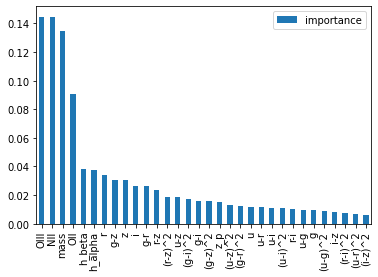

In [33]:
X=data_set1.drop("metallicity",axis=1)
y=data_set1["metallicity"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
etr=ExtraTreesRegressor(n_jobs=-1).fit(x_train,y_train)
feature_importances = pd.DataFrame(etr.feature_importances_, index =x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot.bar()    # plotting ranking based on their importance   
plt.show()

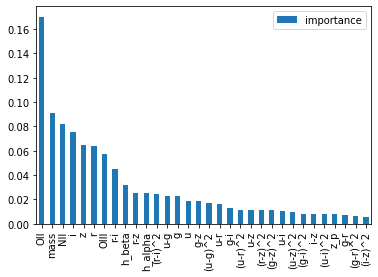

In [35]:
X=data_set2.drop("metallicity",axis=1)
y=data_set2["metallicity"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
etr=ExtraTreesRegressor(n_jobs=-1).fit(x_train,y_train)
feature_importances = pd.DataFrame(etr.feature_importances_, index =x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot.bar()    # plotting ranking based on their importance   
plt.show()